### Stock Market Prediction And Forecasting Using Stacked LSTM

In [50]:
### Keras and Tensorflow >2.0

In [51]:
import pandas as pd
import yfinance as yf

In [52]:
df = yf.download(tickers='AAPL',start='2018-12-1', end='2024-12-1')
df

[*********************100%***********************]  1 of 1 completed

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-12-03,44.131855,46.205002,46.235001,45.302502,46.115002,163210000
2018-12-04,42.190552,44.172501,45.597500,44.067501,45.237499,165377200
2018-12-06,41.720154,43.680000,43.695000,42.605000,42.939999,172393600
2018-12-07,40.232544,42.122501,43.622501,42.075001,43.372501,169126400
2018-12-10,40.497574,42.400002,42.522499,40.832500,41.250000,248104000
...,...,...,...,...,...,...
2024-11-22,229.869995,229.869995,230.720001,228.059998,228.059998,38168300
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800


In [53]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2018-12-03,44.131855,46.205002,46.235001,45.302502,46.115002,163210000
2018-12-04,42.190552,44.172501,45.597500,44.067501,45.237499,165377200
2018-12-06,41.720154,43.680000,43.695000,42.605000,42.939999,172393600
2018-12-07,40.232544,42.122501,43.622501,42.075001,43.372501,169126400
2018-12-10,40.497574,42.400002,42.522499,40.832500,41.250000,248104000


In [54]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-11-22,229.869995,229.869995,230.720001,228.059998,228.059998,38168300
2024-11-25,232.869995,232.869995,233.250000,229.740005,231.460007,90152800
2024-11-26,235.059998,235.059998,235.570007,233.330002,233.330002,45986200
2024-11-27,234.929993,234.929993,235.690002,233.809998,234.470001,33498400
2024-11-29,237.330002,237.330002,237.809998,233.970001,234.809998,28481400


In [55]:
df1=df.reset_index()['Close']

In [56]:
df1

Ticker,AAPL
0,46.205002
1,44.172501
2,43.680000
3,42.122501
4,42.400002
...,...
1503,229.869995
1504,232.869995
1505,235.059998
1506,234.929993


In [57]:
df.rename(columns={'AAPL': 'Close'}, inplace=True)


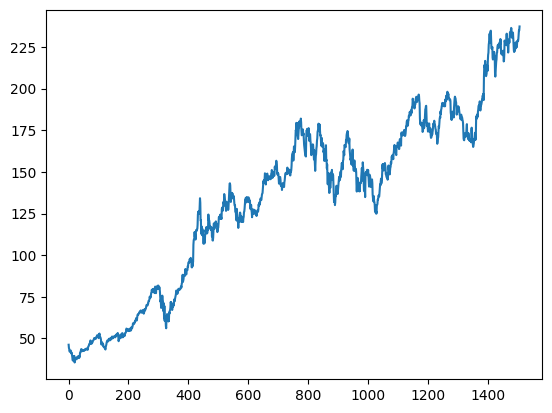

In [58]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [59]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [60]:
import numpy as np

In [61]:
df1

Ticker,AAPL
0,46.205002
1,44.172501
2,43.680000
3,42.122501
4,42.400002
...,...
1503,229.869995
1504,232.869995
1505,235.059998
1506,234.929993


In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [63]:
print(df1)

[[0.05281678]
 [0.04274404]
 [0.0403033 ]
 ...
 [0.98875024]
 [0.98810596]
 [1.        ]]


In [64]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [65]:
training_size,test_size

(980, 528)

In [66]:
train_data

array([[0.05281678],
       [0.04274404],
       [0.0403033 ],
       [0.03258459],
       [0.03395984],
       [0.03275805],
       [0.03334036],
       [0.03563242],
       [0.02885532],
       [0.02694733],
       [0.02958632],
       [0.02316851],
       [0.01813834],
       [0.01058069],
       [0.00574876],
       [0.01855958],
       [0.01729584],
       [0.01739496],
       [0.0192658 ],
       [0.0194888 ],
       [0.        ],
       [0.00752046],
       [0.00711161],
       [0.01060548],
       [0.0137772 ],
       [0.0143843 ],
       [0.01251346],
       [0.00967626],
       [0.01347987],
       [0.01579671],
       [0.01693655],
       [0.01812596],
       [0.01376482],
       [0.01453297],
       [0.01302144],
       [0.01929056],
       [0.0174817 ],
       [0.01547457],
       [0.02857036],
       [0.03004473],
       [0.03014385],
       [0.03600411],
       [0.03963425],
       [0.0397086 ],
       [0.03562004],
       [0.03496339],
       [0.0337492 ],
       [0.035

In [67]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [68]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [69]:
print(X_train.shape), print(y_train.shape)

(879, 100)
(879,)


(None, None)

In [70]:
print(X_test.shape), print(ytest.shape)

(427, 100)
(427,)


(None, None)

In [71]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [72]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [73]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - loss: 0.0707 - val_loss: 0.0692
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.0086 - val_loss: 0.0127
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2

In [77]:
import tensorflow as tf

In [78]:
tf.__version__

'2.17.0'

In [79]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [80]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [81]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

122.58345538985837

In [82]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

191.7118935973641

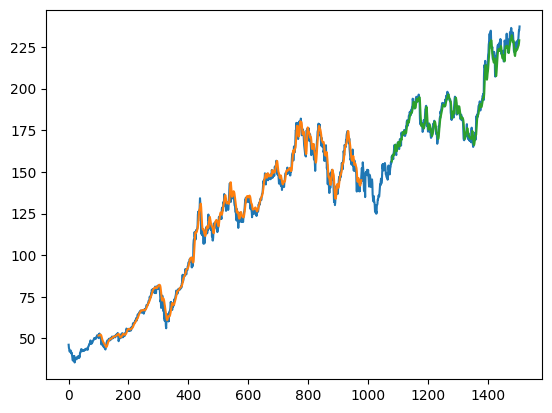

In [83]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [84]:
len(test_data)

528

In [85]:
x_input=test_data[428:].reshape(1,-1)
x_input.shape


(1, 100)

In [86]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [87]:
temp_input

[0.9516311154446403,
 0.9663498643150666,
 0.9854793754817938,
 0.9875608910998156,
 0.958123242118999,
 0.9348307753362103,
 0.9354750575808352,
 0.933740562059126,
 0.938944124244235,
 0.9068798908168455,
 0.9016763286317365,
 0.9040055753100155,
 0.9053932019753755,
 0.9081684553060952,
 0.9244235753460105,
 0.9059878775119635,
 0.9134216241992411,
 0.8609393907358566,
 0.8508294528939692,
 0.8636651129785214,
 0.8809609152074657,
 0.8954815397256718,
 0.9018745286039388,
 0.9204093642340777,
 0.9226394731162647,
 0.9375069664908199,
 0.9440982309612705,
 0.9433052798324987,
 0.9463778709315126,
 0.9458327264829797,
 0.936565346477901,
 0.9480133042771116,
 0.9496982687107655,
 0.9539107554148823,
 0.9462788087554025,
 0.9626329909714278,
 0.958717917655587,
 0.9278431109213553,
 0.9183279242360377,
 0.9259103398074625,
 0.9181792553518907,
 0.9186252620043319,
 0.914660581980454,
 0.9272979664728224,
 0.9278431109213553,
 0.9265050153440505,
 0.895878015290058,
 0.8982071863483551,

In [88]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.97477806]
101
1 day input [0.96634986 0.98547938 0.98756089 0.95812324 0.93483078 0.93547506
 0.93374056 0.93894412 0.90687989 0.90167633 0.90400558 0.9053932
 0.90816846 0.92442358 0.90598788 0.91342162 0.86093939 0.85082945
 0.86366511 0.88096092 0.89548154 0.90187453 0.92040936 0.92263947
 0.93750697 0.94409823 0.94330528 0.94637787 0.94583273 0.93656535
 0.9480133  0.94969827 0.95391076 0.94627881 0.96263299 0.95871792
 0.92784311 0.91832792 0.92591034 0.91817926 0.91862526 0.91466058
 0.92729797 0.92784311 0.92650502 0.89587802 0.89820719 0.91753497
 0.95807364 0.95475324 0.94617967 0.95063989 0.94568406 0.95138331
 0.95272133 0.97854124 0.94489118 0.94771597 0.94221499 0.9478151
 0.9224908  0.9427106  0.96139403 0.95891612 0.95153198 0.97011634
 0.98275373 0.97249512 0.97432876 0.9884529  0.99578751 0.99271492
 0.96744015 0.96649861 0.97066149 0.98052354 0.98186164 0.96416936
 0.94340442 0.92853692 0.92407663 0.93121304 0.9275953  0.95118503
 0.94860806 0.93507858 0.93507858 0

In [89]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [90]:
import matplotlib.pyplot as plt

In [91]:
len(df1)

1508

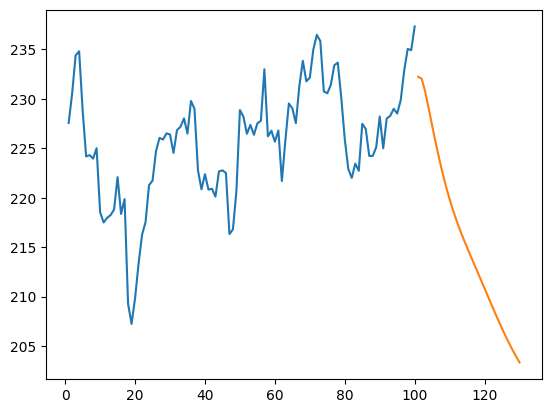

In [98]:
plt.plot(day_new,scaler.inverse_transform(df1[1408:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

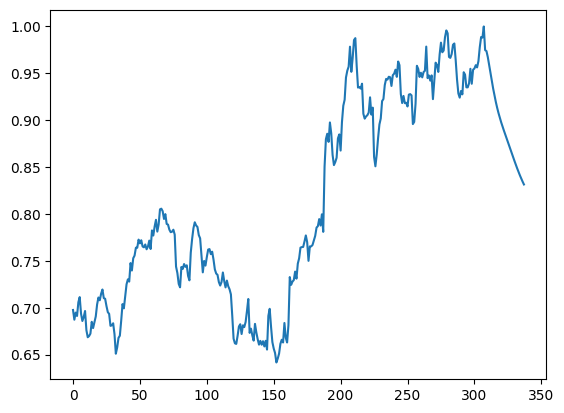

In [95]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [103]:
from datetime import date

actual_df = yf.download(tickers='AAPL',start='2024-12-1',end=date.today())

[*********************100%***********************]  1 of 1 completed


In [96]:
df3=scaler.inverse_transform(df3).tolist()

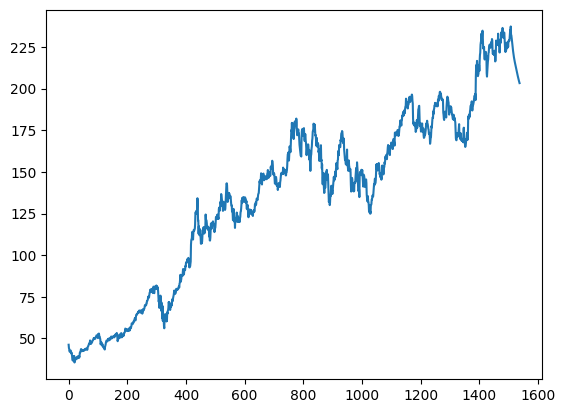

In [97]:
plt.plot(df3)

In [107]:
df1.columns()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

TypeError: list indices must be integers or slices, not str

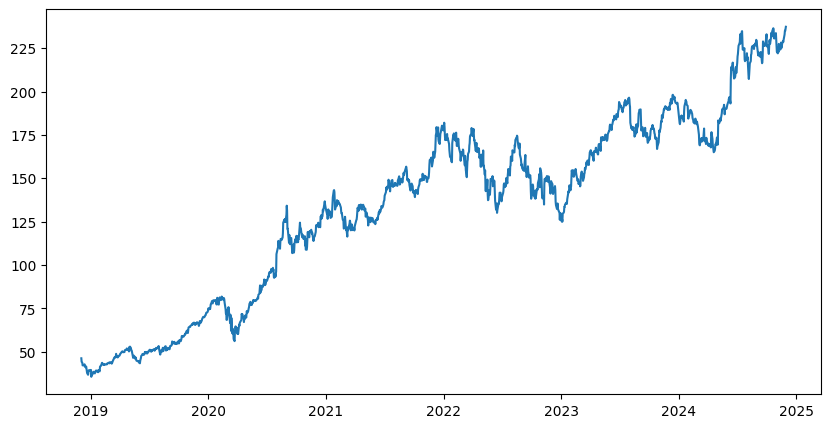

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed')

plt.plot(df3['Close'],label='Actual',color='Black')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()